In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f

In [13]:
# Set the random seed for reproducibility
np.random.seed(44)

In [14]:
# Generate synthetic data
data = {
    'Category': np.repeat(['A', 'B', 'C', 'D'], 25),
    'Value': np.hstack([
        np.random.normal(loc=5, scale=1, size=25),
        np.random.normal(loc=5.5, scale=1.2, size=25),
        np.random.normal(loc=6, scale=0.8, size=25),
        np.random.normal(loc=5.8, scale=1.1, size=25)
    ])
}

In [15]:
df = pd.DataFrame(data)
df

,Category,Value
0,A,4.249385
1,A,6.316357
2,A,6.246140
3,A,3.395084
4,A,3.531856
...,...,...
95,D,6.109303
96,D,6.458510
97,D,6.929892
98,D,5.807636


#### Calculate Group Means, Overall Mean, and Sum of Squares

In [16]:
# Calculate the overall mean
overall_mean = df['Value'].mean()
overall_mean

5.472267444335645

In [17]:
# Calculate the means for each group
group_means = df.groupby('Category')['Value'].mean()
group_means

Category
A    4.785683
B    5.488719
C    6.097904
D    5.516764
Name: Value, dtype: float64

In [18]:
# Calculate the between-group sum of squares (SSB)
SSB = sum(df.groupby('Category').size() * (group_means - overall_mean) ** 2)

In [19]:
# Calculate the within-group sum of squares (SSW)
SSW = sum((df['Value'] - df.groupby('Category')['Value'].transform('mean')) ** 2)

In [20]:
# Degrees of freedom
df_between = len(group_means) - 1
df_within  = len(df) - len(group_means)

In [21]:
# Mean squares
MSB = SSB / df_between
MSW = SSW / df_within

In [22]:
# F-statistic
F_statistic = MSB / MSW
print(f"F-statistic: {F_statistic:.4f}")

F-statistic: 6.2459


#### Calculate the p-value

In [24]:
# Calculate the p-value
p_value = 1 - f.cdf(F_statistic, df_between, df_within)
print(f"P-value: {p_value:.6f}")

P-value: 0.000642


#### Plot the F-Distribution

In [25]:
# Critical value for 95% significance level
alpha = 0.05
F_critical = f.ppf(1 - alpha, df_between, df_within)

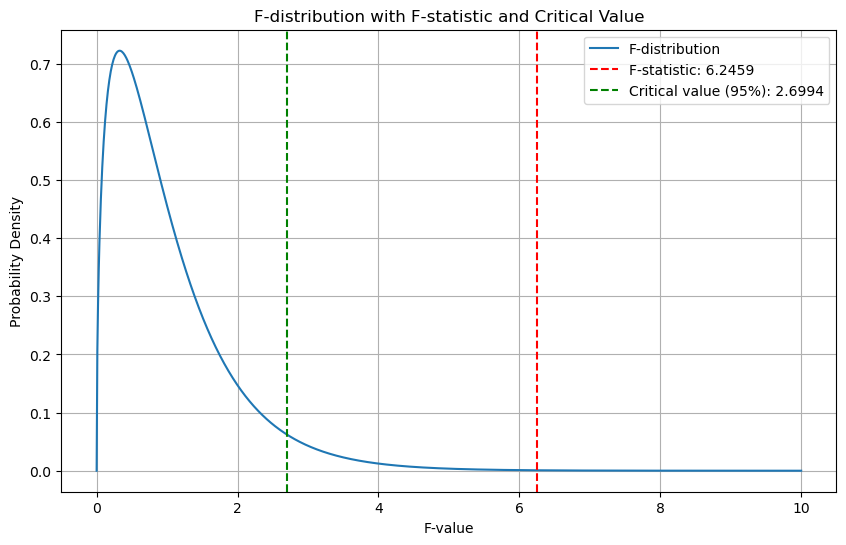

In [26]:
# Plot the F-distribution
x = np.linspace(0, 10, 1000)
y = f.pdf(x, df_between, df_within)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='F-distribution')
plt.axvline(F_statistic, color='r', linestyle='--', label=f'F-statistic: {F_statistic:.4f}')
plt.axvline(F_critical, color='g', linestyle='--', label=f'Critical value (95%): {F_critical:.4f}')
plt.title('F-distribution with F-statistic and Critical Value')
plt.xlabel('F-value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

#### Print the PDF and CDF for the Computed F-Statistic

In [27]:
# Calculate the PDF and CDF for the computed F-statistic
pdf_value = f.pdf(F_statistic, df_between, df_within)
cdf_value = f.cdf(F_statistic, df_between, df_within)

print(f"PDF value for F-statistic: {pdf_value:.4f}")
print(f"CDF value for F-statistic: {cdf_value:.4f}")

PDF value for F-statistic: 0.0008
CDF value for F-statistic: 0.9994


#### Verify the Results Using scipy.stats.f_oneway

In [28]:
from scipy.stats import f_oneway

In [29]:
# Perform ANOVA using scipy
F_stat_scipy, p_value_scipy = f_oneway(
    df[df['Category'] == 'A']['Value'],
    df[df['Category'] == 'B']['Value'],
    df[df['Category'] == 'C']['Value'],
    df[df['Category'] == 'D']['Value']
)

print(f"Scipy F-statistic: {F_stat_scipy:.4f}")
print(f"Scipy P-value: {p_value_scipy:.4f}")

Scipy F-statistic: 6.2459
Scipy P-value: 0.0006
